In [1]:
import pandas as pd

election_df = pd.read_csv("./data/IndianElection19TwitterData.csv")

In [2]:
election_df.head(3)

,Unnamed: 0,Date,User,Tweet
0,0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...
2,2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...


In [3]:
election_df = election_df.drop(columns=['Unnamed: 0'])

In [4]:
election_df.describe()

,Date,User,Tweet
count,142566,142566,142566
unique,140530,49397,142566
top,2019-03-10 12:06:03+00:00,vikram140gulati,CVoter predicts seat share for upcoming #LokSa...
freq,4,1152,1


In [5]:
election_df.isna().sum()

Date     0
User     0
Tweet    0
dtype: int64

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk_data_path = "./venv/lib/python3.12/site-packages/nltk_data"
nltk.data.path.append(nltk_data_path)
nltk.download('stopwords', download_dir=nltk_data_path)
nltk.download('punkt', download_dir=nltk_data_path)

stop_words = set(stopwords.words('english'))
# python -m nltk.downloader stopwords punkt

[nltk_data] Downloading package stopwords to
[nltk_data]     ./venv/lib/python3.12/site-packages/nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to ./venv/lib/python3.12/site-
[nltk_data]     packages/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [7]:
import re
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#', '', text)        # Remove hashtags
    text = re.sub(r'\W', ' ', text)      # Remove special characters
    text = text.lower()                  # Convert to lowercase
    tokens = word_tokenize(text)
    return ' '.join([word for word in tokens if word not in stop_words])

In [ ]:
election_df['cleaned_tweet'] = election_df['Tweet'].apply(clean_text)


,Date,User,Tweet,cleaned_tweet
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,seeing future bjp spokesperson good luck anjan...
1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...,trinamool congress sitting mp abhishek banerje...
2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,loksabhaelections2019 23rd may 2019 reveal eve...
3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,loksabhaelections2019 23rd may 2019 reveal eve...
4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,pm modi creates new record pm democratic count...
...,...,...,...,...
142561,2019-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...,early morning political move detailed discussi...
142562,2019-03-06 10:11:43+00:00,RAMANKAIRA,@DrKumarVishwas Early morning #political move ...,early morning political move detailed discussi...
142563,2019-01-24 12:57:48+00:00,thota_J,CVoter predicts seat share for upcoming #LokSa...,cvoter predicts seat share upcoming loksabhael...
142564,2019-01-24 12:48:37+00:00,thota_J,CVoter predicts seat share for upcoming #LokSa...,cvoter predicts seat share upcoming loksabhael...


In [10]:
election_df.head(10)

,Date,User,Tweet,cleaned_tweet
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,seeing future bjp spokesperson good luck anjan...
1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...,trinamool congress sitting mp abhishek banerje...
2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,loksabhaelections2019 23rd may 2019 reveal eve...
3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,loksabhaelections2019 23rd may 2019 reveal eve...
4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,pm modi creates new record pm democratic count...
5,2019-05-18 22:16:26+00:00,ankitgarg20,My somewhat biased exit poll for India electio...,somewhat biased exit poll india elections base...
6,2019-05-18 21:51:56+00:00,pkm1999,@rupasubramanya Even assuming statistical erro...,even assuming statistical errors estimation bj...
7,2019-05-18 21:43:15+00:00,rohanmodi,@abhijitmajumder Small correction. Nobody gets...,small correction nobody gets appointed bjp pm ...
8,2019-05-18 21:36:20+00:00,Jmend124,We still fucking dancing 🕺🏼 ♏️ #INC,still fucking dancing inc
9,2019-05-18 21:22:29+00:00,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,appointment successor god forbid allow bjp sto...


In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...


In [12]:
def analyze_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] > 0.05:
        return 'positive'
    elif score['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

election_df['sentiment'] = election_df['cleaned_tweet'].apply(analyze_sentiment)

In [13]:
election_df['sentiment'].value_counts()

sentiment
positive    69096
negative    41034
neutral     32436
Name: count, dtype: int64

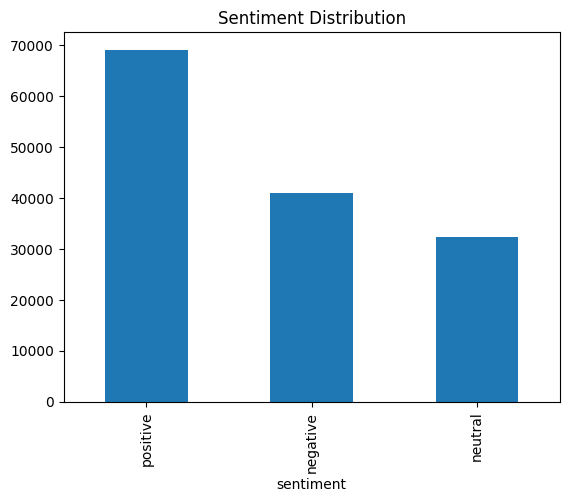

In [15]:
import matplotlib.pyplot as plt

election_df['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.show()


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(election_df['cleaned_tweet'])


In [17]:
# Apply LDA (Latent Dirichlet Allocation)

from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda.fit(dtm)


LatentDirichletAllocation(n_components=5, random_state=42)

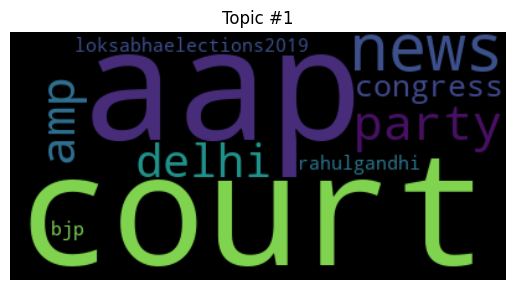

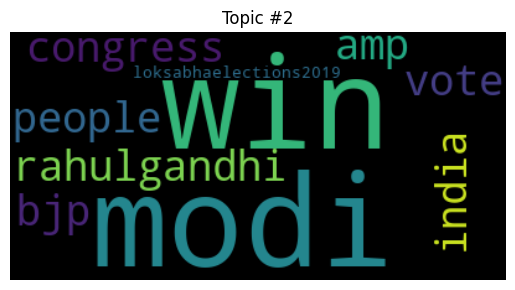

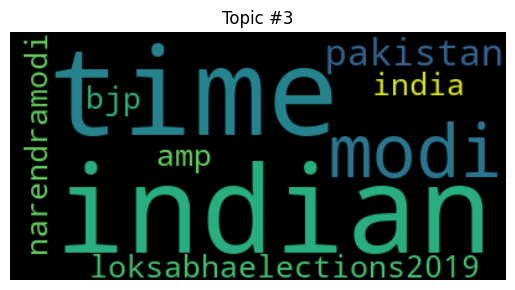

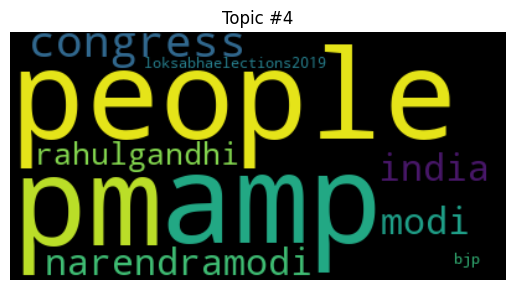

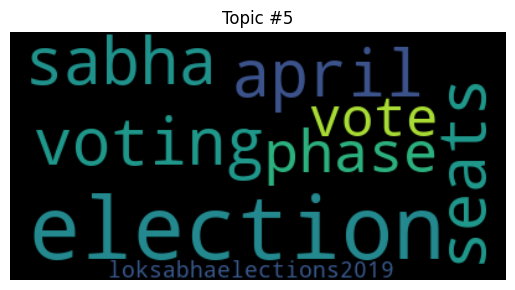

In [18]:
from wordcloud import WordCloud

for index, topic in enumerate(lda.components_):
    wordcloud = WordCloud().generate(' '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]))
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic #{index + 1}")
    plt.show()


<Axes: xlabel='Date'>

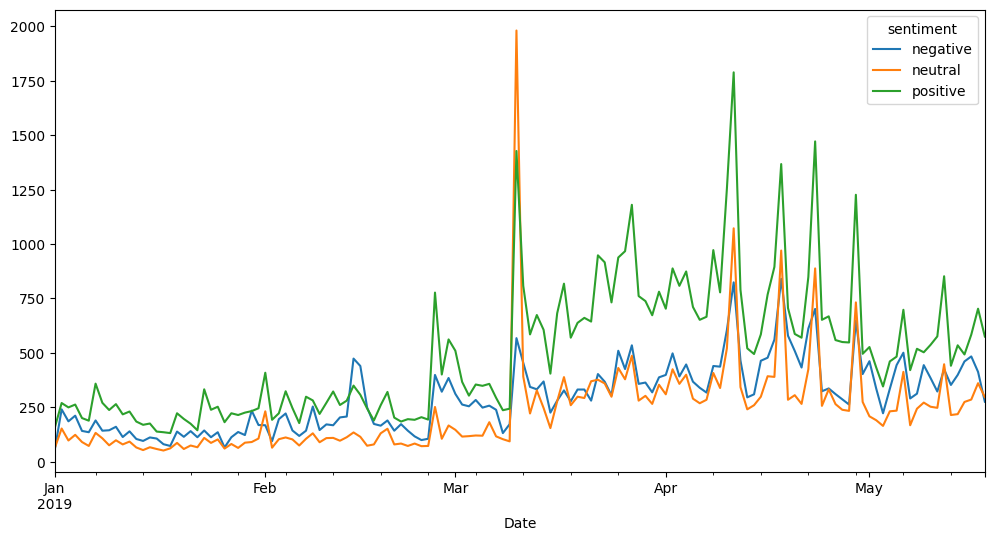

In [19]:
election_df['Date'] = pd.to_datetime(election_df['Date'])
election_df.set_index('Date', inplace=True)
election_df.resample('D')['sentiment'].value_counts().unstack().plot(kind='line', figsize=(12, 6))
